In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import kendalltau

from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
from scipy.stats import kendalltau
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
data = pd.read_csv('ApartmentRentPrediction_Milestone2.csv')
data.head(10)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,RentCategory,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5508832632,housing/rent/apartment,"Two BR - $1,194/mo - Apartment - come and see ...","Come experience. in Cary, NC offering recently...","Clubhouse,Fireplace,Gym,Patio/Deck,Playground,...",2.5,2.0,USD,No,Thumbnail,...,Medium-Priced Rent,Monthly,800,NaN,Cary,NC,35.7585,-78.7783,RentDigs.com,1568755960
1,5664576849,housing/rent/apartment,One BR 640 West Wilson Street,This unit is located at 640 West Wilson Street...,"Cable or Satellite,Dishwasher,Elevator,Garbage...",1.0,1.0,USD,No,Thumbnail,...,Medium-Priced Rent,Monthly,795,640 West Wilson St,Madison,WI,43.0724,-89.4003,RentLingo,1577015508
2,5668619365,housing/rent/apartment,One BR 2777 Sw Archer Rd,"This unit is located at 2777 Sw Archer Rd, Gai...","Basketball,Cable or Satellite,Dishwasher,Inter...",1.0,1.0,USD,No,Thumbnail,...,Medium-Priced Rent,Monthly,560,2777 SW Archer Road,Gainesville,FL,29.6533,-82.3656,RentLingo,1577358921
3,5668632604,housing/rent/apartment,One BR 534-542 Park Avenue,"This unit is located at 534-542 Park Avenue, O...",NaN,1.0,1.0,USD,No,Thumbnail,...,Low Rent,Monthly,600,534-542 Park Ave,Omaha,NE,41.2562,-96.0404,RentLingo,1577359849
4,5668637441,housing/rent/apartment,Three BR 2216 S Palm Grove Ave,"This unit is located at 2216 S Palm Grove Ave,...",NaN,3.0,3.0,USD,No,Thumbnail,...,High Rent,Monthly,1600,2216 S Palm Grove Avenue,Los Angeles,CA,34.0372,-118.2972,RentLingo,1577360159
5,5664597879,housing/rent/apartment,Three BR 680 Bromley Dr.,"This unit is located at 680 Bromley Dr., Baton...",NaN,2.0,3.0,USD,No,Thumbnail,...,Medium-Priced Rent,Monthly,2300,680 Bromley Drive,Baton Rouge,LA,30.4415,-91.1012,RentLingo,1577017123
6,5509268702,housing/rent/apartment,Studio in Lynnwood,We believe that elevating where you live is al...,"Gym,Pool",1.0,2.0,USD,No,Yes,...,High Rent,Monthly,1079,NaN,Lynnwood,WA,47.8616,-122.2729,RentDigs.com,1568782110
7,5664594606,housing/rent/apartment,Three BR 1712 Donald Dr,"This unit is located at 1712 Donald Dr, Shawne...",NaN,2.0,3.0,USD,No,Thumbnail,...,Medium-Priced Rent,Monthly,1177,1712 Donald Drive,Shawnee,OK,35.3537,-96.8923,RentLingo,1577016836
8,5668628991,housing/rent/apartment,One BR 2975 Blackburn St Apartment 678,This unit is located at 2975 Blackburn St Apar...,NaN,1.0,1.0,USD,No,Thumbnail,...,Medium-Priced Rent,Monthly,678,2975 Blackburn St Apartment 678,Dallas,TX,32.8212,-96.7853,RentLingo,1577359585
9,5668609854,housing/rent/apartment,Two BR 290 9th Ave Sw,"This unit is located at 290 ninth Ave Sw, Fore...","Cable or Satellite,Dishwasher,Elevator,Interne...",1.0,2.0,USD,No,Thumbnail,...,Medium-Priced Rent,Monthly,995,290 9th Avenue SW,Forest Lake,MN,45.2764,-92.9901,RentLingo,1577358292


In [3]:
"""put the prediction column at the end"""

predicted_col = data['RentCategory']
data.drop(columns=['RentCategory'], inplace=True)
data['RentCategory'] = predicted_col

In [4]:
# Assuming you have a DataFrame named 'df' with your data

# Splitting the DataFrame into features (X) and target variable (y)
X = data.drop(columns=['RentCategory'])
Y = data['RentCategory']

# Splitting the data into training and test sets (80% training, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Concatenating X_train and y_train
train_data = pd.concat([X_train, Y_train], axis=1)

# Concatenating X_test and y_test
test_data = pd.concat([X_test, Y_test], axis=1)

In [5]:
for column in train_data:
    print(train_data[column].value_counts() , '\n')

id
5668624413    1
5509041081    1
5668630073    1
5508831407    1
5650235161    1
             ..
5668626956    1
5509062971    1
5668617014    1
5509215521    1
5668624902    1
Name: count, Length: 7200, dtype: int64 

category
housing/rent/apartment     7198
housing/rent/short_term       1
housing/rent/home             1
Name: count, dtype: int64 

title
Apartment in great location                                                   27
Super Cute! Apartment for Rent!                                               24
Apartment in prime location                                                   23
This Apartment is a must see!                                                 21
Apartment in quiet area, spacious with big kitchen                            21
                                                                              ..
$1,095 / Two BR - Great Deal. MUST SEE. Pet OK!                                1
Studio apartment 999 Scenic Hill Dr                                      

In [6]:
"""number of nulls in train"""
for column in train_data.columns:
  print(column, '\t', train_data[column].isna().sum())

id 	 0
category 	 0
title 	 0
body 	 0
amenities 	 2539
bathrooms 	 23
bedrooms 	 5
currency 	 0
fee 	 0
has_photo 	 0
pets_allowed 	 3011
price_type 	 0
square_feet 	 0
address 	 2372
cityname 	 51
state 	 51
latitude 	 5
longitude 	 5
source 	 0
time 	 0
RentCategory 	 0


In [7]:
"""number of nulls in test"""
for column in test_data.columns:
  print(column, '\t', test_data[column].isna().sum())

id 	 0
category 	 0
title 	 0
body 	 0
amenities 	 646
bathrooms 	 7
bedrooms 	 2
currency 	 0
fee 	 0
has_photo 	 0
pets_allowed 	 740
price_type 	 0
square_feet 	 0
address 	 599
cityname 	 15
state 	 15
latitude 	 2
longitude 	 2
source 	 0
time 	 0
RentCategory 	 0


In [8]:
class CounterEncoder:
  def transform(self, X):
    ret = X.copy()
    ret = ret.fillna(0).apply(lambda x: 0 if x == 0 else len(str(x).split(',')))
    return ret

In [9]:
"""replace each row in amenities with the **count** of the amenities"""
ce = CounterEncoder()
train_data['amenities'] = ce.transform(train_data['amenities'])
test_data['amenities'] = ce.transform(test_data['amenities'])

In [10]:
"""remove noise"""
print(train_data['category'].value_counts())
train_data = train_data.drop(train_data[(train_data['category'] == 'housing/rent/short_term') | (train_data['category'] == 'housing/rent/home')].index)
print(train_data['category'].value_counts())

category
housing/rent/apartment     7198
housing/rent/short_term       1
housing/rent/home             1
Name: count, dtype: int64
category
housing/rent/apartment    7198
Name: count, dtype: int64


In [11]:
class MeansAndMods:
  def __init__(self):
    self.special = {}  #
  def fit(self, data):

    for col in data.columns:
      if data[col].dtype == 'object':  # Check if the column is categorical
        self.special[col] = data[col].mode()[0]
      elif data[col].dtype == 'float64':
        self.special[col] = data[col].mean()
      else:
        self.special[col] = data[col].mean().astype(int)

  def transform(self, col, value=None):
    if value is None:
      return col.fillna(self.special[col.name])
    else:
      return col.apply(lambda x: self.special[col.name] if x == value else x)

mam = MeansAndMods()
mam.fit(train_data)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19500\645714215.py:12: RuntimeWarning: invalid value encountered in cast
  self.special[col] = data[col].mean().astype(int)


In [12]:
#to be commented
# categoryModeTrain = train_data['category'].mode()[0]

# print(test_data['category'].value_counts())

# for index, value in test_data['category'].items():
#     if value != categoryModeTrain:
#         test_data.at[index, 'category'] = categoryModeTrain

# print(test_data['category'].value_counts())

**replace nulls of longitude and latitude first**

In [13]:
train_data.dropna(subset=['longitude', 'latitude'], inplace=True)

test_data['longitude'] = mam.transform(test_data['longitude'])
test_data['latitude'] = mam.transform(test_data['latitude'])


In [14]:
# Note: The following line is Required as we want these 2 cols without any nulls

class KNN_PP:
  def __init__(self):
    self.knn =  KNeighborsClassifier(n_neighbors=1)

  def fit(self, X, Y):
    self.X_train = X[Y.notnull()]
    self.Y_train = Y.dropna()
    self.knn.fit(self.X_train, self.Y_train)

  def transform(self, X, Y):
    X_test = X[Y.isnull()]
    Y_pred = Y.copy()
    Y_pred[X_test.index] = self.knn.predict(X_test)
    return Y_pred

  def fit_transform(self, X, Y):
    self.fit(X, Y)
    return self.transform(X, Y)

city_KP = KNN_PP()
train_data['cityname'] = city_KP.fit_transform(train_data.loc[:, ['latitude', 'longitude']], train_data['cityname'])
test_data['cityname'] = city_KP.transform(test_data.loc[:, ['latitude', 'longitude']], test_data['cityname'])

state_KP = KNN_PP()
train_data['state'] = state_KP.fit_transform(train_data.loc[:, ['latitude', 'longitude']], train_data['state'])
test_data['state'] = state_KP.transform(test_data.loc[:, ['latitude', 'longitude']], test_data['state'])

In [15]:
train_data['bathrooms'] = mam.transform(train_data['bathrooms'])
train_data['bedrooms']  = mam.transform(train_data['bedrooms'])

train_data['bathrooms'] = train_data['bathrooms'].astype(int)
train_data['bedrooms'] = train_data['bedrooms'].astype(int)

In [16]:
test_data['bathrooms'] = mam.transform(test_data['bathrooms'])
test_data['bedrooms']  = mam.transform(test_data['bedrooms'])

test_data['bathrooms'] = test_data['bathrooms'].astype(int)
test_data['bedrooms'] = test_data['bedrooms'].astype(int)

In [17]:
class OHE:
  def __init__(self, removeCol):
    self.removeCol = removeCol
  def fit(self, data, suff = 'allowed'):
    self.addCols = set()
    for val in data[self.removeCol].value_counts().index:
      for string in str(val).split(','):
        self.addCols.add(string.lower() + '_' + suff)

  def transform(self, data):
    data[self.removeCol].fillna('', inplace=True)
    for col in self.addCols:
      data.insert(data.columns.get_loc(self.removeCol), col, np.zeros(data.shape[0], dtype=int))
      data.loc[data[self.removeCol].str.contains(col[:col.find('_')], case=False), col] = 1
    data.drop(columns=self.removeCol, inplace=True)

  def fit_transform(self, data, suff = 'allowed'):
    self.fit(data, suff)
    self.transform(data)

In [18]:
print(train_data['pets_allowed'].value_counts())

pets_ohe = OHE(removeCol='pets_allowed')
pets_ohe.fit_transform(train_data)
pets_ohe.transform(test_data)

print(train_data['cats_allowed'].value_counts(), train_data['dogs_allowed'].value_counts())

pets_allowed
Cats,Dogs    3748
Cats          345
Dogs           94
Name: count, dtype: int64
cats_allowed
1    4093
0    3100
Name: count, dtype: int64 dogs_allowed
1    3842
0    3351
Name: count, dtype: int64


In [19]:
"""number of nulls"""
for column in train_data.columns:
  print(column, '\t',train_data[column].isna().sum())

id 	 0
category 	 0
title 	 0
body 	 0
amenities 	 0
bathrooms 	 0
bedrooms 	 0
currency 	 0
fee 	 0
has_photo 	 0
cats_allowed 	 0
dogs_allowed 	 0
price_type 	 0
square_feet 	 0
address 	 2366
cityname 	 0
state 	 0
latitude 	 0
longitude 	 0
source 	 0
time 	 0
RentCategory 	 0


In [20]:
"""number of nulls"""
for column in test_data.columns:
  print(column, '\t',test_data[column].isna().sum())

id 	 0
category 	 0
title 	 0
body 	 0
amenities 	 0
bathrooms 	 0
bedrooms 	 0
currency 	 0
fee 	 0
has_photo 	 0
cats_allowed 	 0
dogs_allowed 	 0
price_type 	 0
square_feet 	 0
address 	 599
cityname 	 0
state 	 0
latitude 	 0
longitude 	 0
source 	 0
time 	 0
RentCategory 	 0


In [21]:
train_data['address'].fillna('Unknown', inplace=True)
mam.fit(train_data)
test_data['address'] = mam.transform(test_data['address'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_19500\645714215.py:12: RuntimeWarning: invalid value encountered in cast
  self.special[col] = data[col].mean().astype(int)


In [22]:
for col in train_data.columns:
    train_data[col] = mam.transform(train_data[col])
for col in test_data.columns:
    test_data[col] = mam.transform(test_data[col])

In [23]:
"""number of nulls"""
for column in train_data.columns:
  print(column, '\t',train_data[column].isna().sum())

id 	 0
category 	 0
title 	 0
body 	 0
amenities 	 0
bathrooms 	 0
bedrooms 	 0
currency 	 0
fee 	 0
has_photo 	 0
cats_allowed 	 0
dogs_allowed 	 0
price_type 	 0
square_feet 	 0
address 	 0
cityname 	 0
state 	 0
latitude 	 0
longitude 	 0
source 	 0
time 	 0
RentCategory 	 0


In [24]:
photo_ohe = OHE('has_photo')
photo_ohe.fit_transform(train_data, 'photo')
train_data.drop(columns=['no_photo'], inplace=True)
photo_ohe.transform(test_data)
test_data.drop(columns=['no_photo'], inplace=True)

In [25]:
def count_outliers(df):
    for column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
        print(f"Number of outliers in '{column_name}': {outliers.shape[0]}")

In [26]:
outliercolums = ['bathrooms', 'bedrooms', 'square_feet']
print(count_outliers(train_data[outliercolums]))
# pd.set_option('display.max_rows', None)
print(train_data['bedrooms'].value_counts())

Number of outliers in 'bathrooms': 48
Number of outliers in 'bedrooms': 370
Number of outliers in 'square_feet': 461
None
bedrooms
1    3314
2    2448
3     927
4     296
0     134
5      62
6       7
7       3
8       2
Name: count, dtype: int64


<Axes: ylabel='square_feet'>

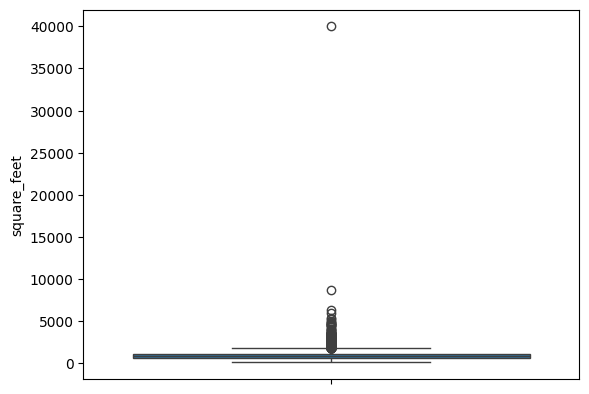

In [27]:
sns.boxplot(train_data['square_feet'])


<Axes: ylabel='bedrooms'>

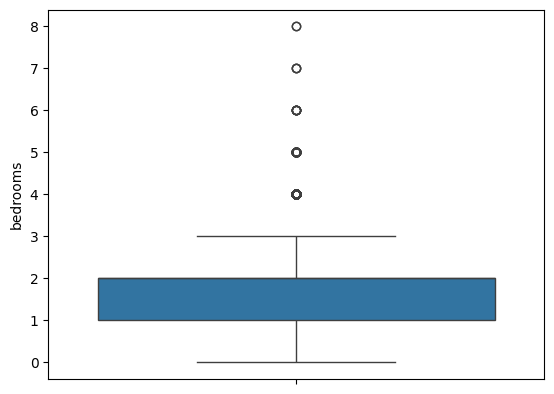

In [28]:
sns.boxplot(train_data['bedrooms'])

<Axes: ylabel='bathrooms'>

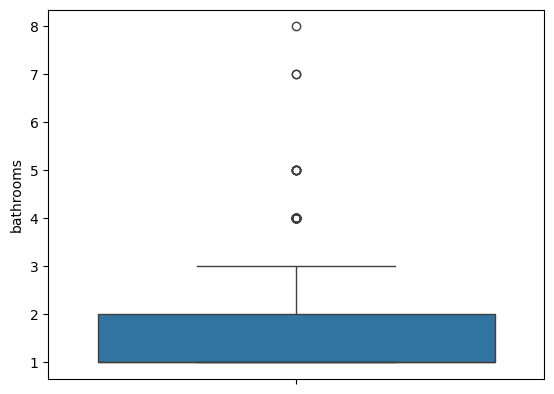

In [29]:
sns.boxplot(train_data['bathrooms'])

In [30]:
def replace_outliers(df, columns):
    for column_name in columns:
        # Calculate quartiles
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        # Calculate IQR
        IQR = Q3 - Q1
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Replace outliers below the lower bound with Q1 - 1.5 * IQR
        df.loc[df[column_name] < lower_bound, column_name] = lower_bound
        # Replace outliers above the upper bound with Q3 + 1.5 * IQR
        df.loc[df[column_name] > upper_bound, column_name] = upper_bound
    return df

In [31]:
train_data = replace_outliers(train_data, outliercolums)
print(count_outliers(train_data[outliercolums]))
#print(train_data['square_feet'].max())

Number of outliers in 'bathrooms': 0
Number of outliers in 'bedrooms': 0
Number of outliers in 'square_feet': 0
None


C:\Users\DELL\AppData\Local\Temp\ipykernel_19500\3512025756.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df[column_name] < lower_bound, column_name] = lower_bound
C:\Users\DELL\AppData\Local\Temp\ipykernel_19500\3512025756.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df[column_name] < lower_bound, column_name] = lower_bound


In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7193 entries, 6317 to 7270
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7193 non-null   int64  
 1   category         7193 non-null   object 
 2   title            7193 non-null   object 
 3   body             7193 non-null   object 
 4   amenities        7193 non-null   int64  
 5   bathrooms        7193 non-null   float64
 6   bedrooms         7193 non-null   float64
 7   currency         7193 non-null   object 
 8   fee              7193 non-null   object 
 9   thumbnail_photo  7193 non-null   int32  
 10  yes_photo        7193 non-null   int32  
 11  cats_allowed     7193 non-null   int32  
 12  dogs_allowed     7193 non-null   int32  
 13  price_type       7193 non-null   object 
 14  square_feet      7193 non-null   int64  
 15  address          7193 non-null   object 
 16  cityname         7193 non-null   object 
 17  state           

In [33]:
# def Feature_Encoder(X, cols):
#     for c in cols:
#         lbl = LabelEncoder()
#         lbl.fit(list(X[c].values))

#         X[c] = lbl.transform(list(X[c].values))
#     return X

In [34]:
#remove noise
train_data = train_data.drop(train_data[(train_data['price_type'] == 'Weekly') | (train_data['price_type'] == 'Monthly|Weekly')].index)
mam.fit(train_data)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19500\645714215.py:12: RuntimeWarning: invalid value encountered in cast
  self.special[col] = data[col].mean().astype(int)


In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7191 entries, 6317 to 7270
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7191 non-null   int64  
 1   category         7191 non-null   object 
 2   title            7191 non-null   object 
 3   body             7191 non-null   object 
 4   amenities        7191 non-null   int64  
 5   bathrooms        7191 non-null   float64
 6   bedrooms         7191 non-null   float64
 7   currency         7191 non-null   object 
 8   fee              7191 non-null   object 
 9   thumbnail_photo  7191 non-null   int32  
 10  yes_photo        7191 non-null   int32  
 11  cats_allowed     7191 non-null   int32  
 12  dogs_allowed     7191 non-null   int32  
 13  price_type       7191 non-null   object 
 14  square_feet      7191 non-null   int64  
 15  address          7191 non-null   object 
 16  cityname         7191 non-null   object 
 17  state           

In [36]:
cols=('category','title','body','cityname', 'state', 'source', 'address','fee','currency','price_type')

lbls = []
for c in cols:
    lbl = LabelEncoder()
    train_data[c] = lbl.fit_transform(list(train_data[c].values))
    lbls.append(lbl)
    encoded_labels = []
    for idx, val in test_data[c].items():
      if val not in lbl.classes_:
        test_data.at[idx,c] = mam.special[c]
    test_data[c] = lbl.transform(test_data[c])

train_data['RentCategory'] = train_data['RentCategory'].replace({'Medium-Priced Rent': 1, 'Low Rent': 0, 'High Rent': 2})
test_data['RentCategory'] = test_data['RentCategory'].replace({'Medium-Priced Rent': 1, 'Low Rent': 0, 'High Rent': 2})

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7191 entries, 6317 to 7270
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7191 non-null   int64  
 1   category         7191 non-null   int64  
 2   title            7191 non-null   int64  
 3   body             7191 non-null   int64  
 4   amenities        7191 non-null   int64  
 5   bathrooms        7191 non-null   float64
 6   bedrooms         7191 non-null   float64
 7   currency         7191 non-null   int64  
 8   fee              7191 non-null   int64  
 9   thumbnail_photo  7191 non-null   int32  
 10  yes_photo        7191 non-null   int32  
 11  cats_allowed     7191 non-null   int32  
 12  dogs_allowed     7191 non-null   int32  
 13  price_type       7191 non-null   int64  
 14  square_feet      7191 non-null   int64  
 15  address          7191 non-null   int64  
 16  cityname         7191 non-null   int64  
 17  state           

In [38]:
train_data.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,thumbnail_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,RentCategory
6317,5668624413,0,5031,3675,2,2.0,3.0,0,0,1,...,0,1459,1892,1055,9,27.7164,-82.4294,8,1577359238,1
740,5664573224,0,4839,2411,2,2.0,3.0,0,0,1,...,0,1581,519,303,10,33.9217,-84.8634,8,1577015200,1
3781,5508812979,0,406,1164,1,2.0,2.0,0,0,1,...,0,1123,4813,632,32,36.1536,-115.1965,7,1568754593,1
7850,5664596563,0,5005,3445,0,2.0,3.0,0,0,1,...,0,1778,1645,1093,4,34.4312,-119.7292,8,1577016996,2
2963,5668639298,0,4157,2686,0,1.0,0.0,0,0,1,...,0,350,810,978,36,45.5091,-122.6449,8,1577360303,1


In [39]:
from sklearn.preprocessing import MinMaxScaler

RentCategoryData = train_data['RentCategory']
train_data.drop(columns=['RentCategory'], inplace = True)

column_names = train_data.columns

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
print(train_data.info())
train_data_scaled = scaler.fit_transform(train_data)

# Create a new DataFrame with scaled data
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=column_names)

train_data = train_data_scaled_df
train_data['RentCategory'] = RentCategoryData.values

<class 'pandas.core.frame.DataFrame'>
Index: 7191 entries, 6317 to 7270
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7191 non-null   int64  
 1   category         7191 non-null   int64  
 2   title            7191 non-null   int64  
 3   body             7191 non-null   int64  
 4   amenities        7191 non-null   int64  
 5   bathrooms        7191 non-null   float64
 6   bedrooms         7191 non-null   float64
 7   currency         7191 non-null   int64  
 8   fee              7191 non-null   int64  
 9   thumbnail_photo  7191 non-null   int32  
 10  yes_photo        7191 non-null   int32  
 11  cats_allowed     7191 non-null   int32  
 12  dogs_allowed     7191 non-null   int32  
 13  price_type       7191 non-null   int64  
 14  square_feet      7191 non-null   int64  
 15  address          7191 non-null   int64  
 16  cityname         7191 non-null   int64  
 17  state           

In [40]:
print(train_data.head())

         id  category     title      body  amenities  bathrooms  bedrooms  \
0  0.999762       0.0  0.741817  0.512338   0.111111        0.4  0.857143   
1  0.974443       0.0  0.713506  0.336122   0.111111        0.4  0.857143   
2  0.000993       0.0  0.059864  0.162275   0.055556        0.4  0.571429   
3  0.974589       0.0  0.737983  0.480273   0.000000        0.4  0.857143   
4  0.999855       0.0  0.612946  0.374460   0.000000        0.0  0.000000   

   currency  fee  thumbnail_photo  ...  price_type  square_feet   address  \
0       0.0  0.0              1.0  ...         0.0     0.809211  0.392857   
1       0.0  0.0              1.0  ...         0.0     0.882177  0.107766   
2       0.0  0.0              1.0  ...         0.0     0.608254  0.999377   
3       0.0  0.0              1.0  ...         0.0     1.000000  0.341570   
4       0.0  0.0              1.0  ...         0.0     0.145933  0.168189   

   cityname     state  latitude  longitude  source      time  RentCategory

In [41]:
print(test_data.head())

              id  category  title  body  amenities  bathrooms  bedrooms  \
7940  5509201929         0    270  7025         13          2         2   
1162  5668627277         0    270  7025          0          1         2   
582   5508866806         0    270  7025          5          1         1   
4081  5651549929         0    270  7025          4          1         2   
8412  5668634408         0    270  7025          0          1         2   

      currency  fee  thumbnail_photo  ...  price_type  square_feet  address  \
7940         0    0                0  ...           0         1058     4813   
1162         0    0                1  ...           0         1400     4813   
582          0    0                1  ...           0          630     4813   
4081         0    0                1  ...           0          840     4813   
8412         0    0                1  ...           0          600     4813   

      cityname  state  latitude  longitude  source        time  RentCatego

In [42]:
RentCategoryDataTest = test_data['RentCategory']
test_data.drop(columns=['RentCategory'], inplace=True)

test_data_scaled = scaler.transform(test_data)

test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=column_names)
test_data= test_data_scaled_df
test_data['RentCategory'] = RentCategoryDataTest.values


In [43]:
print(test_data.head())

         id  category     title      body  amenities  bathrooms  bedrooms  \
0  0.003424       0.0  0.039811  0.979367   0.722222        0.4  0.571429   
1  0.999779       0.0  0.039811  0.979367   0.000000        0.0  0.571429   
2  0.001329       0.0  0.039811  0.979367   0.277778        0.0  0.285714   
3  0.893052       0.0  0.039811  0.979367   0.222222        0.0  0.571429   
4  0.999824       0.0  0.039811  0.979367   0.000000        0.0  0.571429   

   currency  fee  thumbnail_photo  ...  price_type  square_feet   address  \
0       0.0  0.0              0.0  ...         0.0     0.569378  0.999377   
1       0.0  0.0              1.0  ...         0.0     0.773923  0.999377   
2       0.0  0.0              1.0  ...         0.0     0.313397  0.999377   
3       0.0  0.0              1.0  ...         0.0     0.438995  0.999377   
4       0.0  0.0              1.0  ...         0.0     0.295455  0.999377   

   cityname     state  latitude  longitude  source      time  RentCategory

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7191 non-null   float64
 1   category         7191 non-null   float64
 2   title            7191 non-null   float64
 3   body             7191 non-null   float64
 4   amenities        7191 non-null   float64
 5   bathrooms        7191 non-null   float64
 6   bedrooms         7191 non-null   float64
 7   currency         7191 non-null   float64
 8   fee              7191 non-null   float64
 9   thumbnail_photo  7191 non-null   float64
 10  yes_photo        7191 non-null   float64
 11  cats_allowed     7191 non-null   float64
 12  dogs_allowed     7191 non-null   float64
 13  price_type       7191 non-null   float64
 14  square_feet      7191 non-null   float64
 15  address          7191 non-null   float64
 16  cityname         7191 non-null   float64
 17  state         

In [45]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7191 non-null   float64
 1   category         7191 non-null   float64
 2   title            7191 non-null   float64
 3   body             7191 non-null   float64
 4   amenities        7191 non-null   float64
 5   bathrooms        7191 non-null   float64
 6   bedrooms         7191 non-null   float64
 7   currency         7191 non-null   float64
 8   fee              7191 non-null   float64
 9   thumbnail_photo  7191 non-null   float64
 10  yes_photo        7191 non-null   float64
 11  cats_allowed     7191 non-null   float64
 12  dogs_allowed     7191 non-null   float64
 13  price_type       7191 non-null   float64
 14  square_feet      7191 non-null   float64
 15  address          7191 non-null   float64
 16  cityname         7191 non-null   float64
 17  state         

In [46]:
# train_data.dropna(axis=1, inplace=True)

In [47]:
#train_data.head(7)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7191 non-null   float64
 1   category         7191 non-null   float64
 2   title            7191 non-null   float64
 3   body             7191 non-null   float64
 4   amenities        7191 non-null   float64
 5   bathrooms        7191 non-null   float64
 6   bedrooms         7191 non-null   float64
 7   currency         7191 non-null   float64
 8   fee              7191 non-null   float64
 9   thumbnail_photo  7191 non-null   float64
 10  yes_photo        7191 non-null   float64
 11  cats_allowed     7191 non-null   float64
 12  dogs_allowed     7191 non-null   float64
 13  price_type       7191 non-null   float64
 14  square_feet      7191 non-null   float64
 15  address          7191 non-null   float64
 16  cityname         7191 non-null   float64
 17  state         

In [48]:
# from sklearn.feature_selection import SelectKBest, chi2

# # Encode categorical variables if not already done. Assuming it's done in your preprocessing.
# # Ensure there are no negative values as chi2 cannot handle them. Chi2 is only for non-negative features and class labels.
# # Since you've handled missing values and encoding, you can directly apply Chi-square.

# # Applying SelectKBest class to extract top 'k' best features
# # Here, 'k' can be any number or you can use 'k='all' to select all features
# k = 10  # Example: select the top 10 features
# bestfeatures = SelectKBest(score_func=chi2, k=k)
# fit = bestfeatures.fit(train_data.drop('RentCategory', axis=1), train_data['RentCategory'])

# # Get the scores for each feature
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(train_data.drop('RentCategory', axis=1).columns)

# # Concatenate two dataframes for better visualization
# featureScores = pd.concat([dfcolumns, dfscores], axis=1)
# featureScores.columns = ['Feature', 'Score']  # naming the dataframe columns
# print(featureScores.nlargest(k, 'Score'))  # print k best features

# # You can now decide to keep only the top k features:
# train_data_selected_features = train_data[featureScores.nlargest(k, 'Score')['Feature'].tolist() + ['RentCategory']]

In [49]:
# c = train_data.corr()
# top_features = c.index[abs(c['RentCategory'])>=0.0]
# plt.subplots(figsize=(20, 15))
# top_corr = train_data[top_features].corr()
# sns.heatmap(top_corr, annot=True)
# plt.show()
# print(top_features)
# top_features = top_features.delete(-1)
# print(top_features)


In [50]:
categorical_columns = ['category', 'title', 'body', 'currency', 'fee', 'yes_photo', 'thumbnail_photo', 'cats_allowed', 'dogs_allowed', 'price_type', 'address', 'cityname', 'state', 'source']
numerical_columns = ['id', 'bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'time','amenities']

categorical_data = train_data[categorical_columns]
numerical_data = train_data[numerical_columns]

## feature Slectoin

### mutual information

In [51]:
def select_best_features_mutual_info(X, Y, num_features):
    # Compute mutual information scores
    mi_scores = mutual_info_classif(X, Y)

    # Create a DataFrame to store feature names and their corresponding mutual information scores
    mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})

    # Sort features based on mutual information scores (descending order)
    mi_df_sorted = mi_df.sort_values(by='MI_Score', ascending=False)

    # Select top features
    selected_features = mi_df_sorted.iloc[:num_features]['Feature'].tolist()

    # Create DataFrame with selected features
    X_top = X[selected_features]

    return X_top.columns.tolist()

### chi-squared

In [52]:

def select_best_features_chi2(X, Y, num_features):
    # SelectKBest with chi-squared as the scoring function
    selector = SelectKBest(score_func=chi2, k=num_features)
    X_new = selector.fit_transform(X, Y)

    # Get chi-squared scores and corresponding feature names
    chi2_scores = selector.scores_
    feature_names = X.columns

    # Create a DataFrame to store feature names and their corresponding chi-squared scores
    chi2_df = pd.DataFrame({'Feature': feature_names, 'Chi2_Score': chi2_scores})

    # Sort features based on chi-squared scores (descending order)
    chi2_df_sorted = chi2_df.sort_values(by='Chi2_Score', ascending=False)

    # Select top features
    selected_features = chi2_df_sorted.iloc[:num_features]['Feature'].tolist()

    # Create DataFrame with selected features
    X_top = X[selected_features]

    return X_top.columns.tolist()

### anova

In [53]:
def select_best_features_anova(X, Y, num_features):

    # Perform ANOVA for feature selection
    best_features = SelectKBest(score_func=f_classif, k=num_features)
    fit = best_features.fit(X, Y)

    # Get ANOVA F-values and corresponding feature names
    f_scores = pd.DataFrame(fit.scores_)
    feature_names = pd.DataFrame(X.columns)

    # Combine feature names and their ANOVA F-values
    feature_scores = pd.concat([feature_names, f_scores], axis=1)
    feature_scores.columns = ['Feature', 'Score']  # Naming the DataFrame columns

    # Sort features based on ANOVA F-values (descending order)
    feature_scores_sorted = feature_scores.sort_values(by='Score', ascending=False)

    # Select top features
    selected_features = feature_scores_sorted.iloc[:num_features]['Feature'].tolist()

    # Create DataFrame with selected features
    X_top = X[selected_features]

    return X_top.columns.tolist()

###  kendall

In [54]:
def select_best_features_kendall_tau(X, Y, num_features):
    # Compute Kendall's tau between each feature and the target
    scores, pvalues = [], []
    for column in X.columns:
        score, pvalue = kendalltau(X[column], Y)
        scores.append(score if pd.notnull(score) else 0)  # handle NaN scores
        pvalues.append(pvalue)

    # Create DataFrame to view scores and p-values
    dfscores = pd.DataFrame(scores, index=X.columns, columns=['Score'])
    dfpvalues = pd.DataFrame(pvalues, index=X.columns, columns=['PValue'])

    # Combine scores and p-values into a single DataFrame
    feature_scores = pd.concat([dfscores, dfpvalues], axis=1)
    feature_scores.reset_index(inplace=True)
    feature_scores.columns = ['Feature', 'Score', 'PValue']  # Rename the DataFrame columns

    # Select the top k features based on the score
    selected_features = feature_scores.nlargest(num_features, 'Score')['Feature'].tolist()

    # Create DataFrame with selected features
    X_top = X[selected_features]

    return X_top.columns.tolist()

In [55]:
categorical_features = select_best_features_chi2(categorical_data, train_data['RentCategory'], 5)
numerical_features = select_best_features_anova(numerical_data, train_data['RentCategory'], 5)

X_top_features = categorical_features + numerical_features
X_top_features

['state',
 'yes_photo',
 'cats_allowed',
 'dogs_allowed',
 'cityname',
 'square_feet',
 'bathrooms',
 'bedrooms',
 'longitude',
 'time']

In [56]:
X_train = train_data[X_top_features]
Y_train = train_data['RentCategory']

X_test = test_data[X_top_features]
Y_test = test_data['RentCategory']

## models

In [57]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svm_classifier = svm.SVC(kernel='linear', C=1)

svm_classifier.fit(X_train, Y_train)

# Make predictions on the training set
Y_train_predicted = svm_classifier.predict(X_train)

# Compute training accuracy
train_accuracy = accuracy_score(Y_train, Y_train_predicted)
print("Train accuracy:", train_accuracy)


# Make predictions on the test set
Y_test_predicted = svm_classifier.predict(X_test)

# Compute test accuracy
test_accuracy = accuracy_score(Y_test, Y_test_predicted)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.5620915032679739
Test accuracy: 0.5505555555555556


In [58]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train XGBoost classifier
xgb_classifier.fit(X_train, Y_train)

# Make predictions on the training set
Y_train_predicted = xgb_classifier.predict(X_train)

# Compute training accuracy
train_accuracy = accuracy_score(Y_train, Y_train_predicted)
print("Training accuracy:", train_accuracy)

# Make predictions on the test set
Y_test_predicted = xgb_classifier.predict(X_test)

# Compute test accuracy
test_accuracy = accuracy_score(Y_test, Y_test_predicted)
print("Test accuracy:", test_accuracy)

Training accuracy: 0.9556389931859268
Test accuracy: 0.7911111111111111


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Fit on training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the training set
Y_train_predicted_rf = rf_classifier.predict(X_train)

# Compute training accuracy
train_accuracy_rf = accuracy_score(Y_train, Y_train_predicted_rf)
print("Random Forest Training accuracy:", train_accuracy_rf)

# Make predictions on the test set
Y_test_predicted_rf = rf_classifier.predict(X_test)

# Compute test accuracy
test_accuracy_rf = accuracy_score(Y_test, Y_test_predicted_rf)
print("Random Forest Test accuracy:", test_accuracy_rf)

Random Forest Training accuracy: 0.9851202892504519
Random Forest Test accuracy: 0.755


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Assuming X_train, Y_train contain the training features and labels
# Assuming X_test, Y_test contain the test features and labels
# Assuming X_top_features contains the selected features
# Create KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=2)
# Fit on training data
knn_classifier.fit(X_train, Y_train)
# Make predictions on the training set
Y_train_predicted_knn = knn_classifier.predict(X_train)
# Compute training accuracy
train_accuracy_knn = accuracy_score(Y_train, Y_train_predicted_knn)
print("KNN Training accuracy:", train_accuracy_knn)

# Make predictions on the test set
Y_test_predicted_knn = knn_classifier.predict(X_test)

# Compute test accuracy
test_accuracy_knn = accuracy_score(Y_test, Y_test_predicted_knn)
print("KNN Test accuracy:", test_accuracy_knn)

KNN Training accuracy: 0.8386872479488249
KNN Test accuracy: 0.6655555555555556


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X_train and Y_train contain the training features and labels
# Assuming X_test and Y_test contain the test features and labels
# Assuming X_top_features contains the selected features

# Create logistic regression model
logreg = LogisticRegression()

# Fit on training data
logreg.fit(X_train, Y_train)

# Make predictions on the training set
Y_train_predicted_lr = logreg.predict(X_train)

# Compute training accuracy
train_accuracy_lr = accuracy_score(Y_train, Y_train_predicted_lr)
print("Logistic Regression Training accuracy:", train_accuracy_lr)

# Make predictions on the test set
Y_test_predicted_lr = logreg.predict(X_test)

# Compute test accuracy
test_accuracy_lr = accuracy_score(Y_test, Y_test_predicted_lr)
print("Logistic Regression Test accuracy:", test_accuracy_lr)


Logistic Regression Training accuracy: 0.5939368655263524
Logistic Regression Test accuracy: 0.5883333333333334


In [62]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import svm, datasets

# C = 1
# svc = svm.SVC(kernel='linear', C=C).fit(X_train, Y_train)
# lin_svc = svm.LinearSVC(C=C).fit(X_train, Y_train)
# rbf_svc = svm.SVC(kernel='rbf', gamma=1.8, C=C).fit(X_train, Y_train)
# poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, Y_train)


# Y_train_predicted = svc.predict(X_train)
# train_accuracy = accuracy_score(Y_train, Y_train_predicted)
# print(f" svc Train accuracy = ",train_accuracy)


# Y_train_predicted = lin_svc.predict(X_train)
# train_accuracy = accuracy_score(Y_train, Y_train_predicted)
# print(f" svc Train accuracy = ",train_accuracy)



# Y_train_predicted = rbf_svc.predict(X_train)
# train_accuracy = accuracy_score(Y_train, Y_train_predicted)
# print(f" svc Train accuracy = ",train_accuracy)

In [63]:


# X_train = train_data[X_top_features]
# Y_train = train_data['RentCategory']
# logreg = LogisticRegression()

# logreg.fit(X_train, Y_train)

# filename = 'finalized_model.sav'



# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_train, Y_train)
# result

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = SVC(probability=True)
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svm', clf3)], voting='soft')
voting_clf.fit(X_train, Y_train)

# Predict on test set


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [65]:
y_pred_train = voting_clf.predict(X_train)
y_pred_test = voting_clf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, y_pred_train)
test_accuracy = accuracy_score(Y_test, y_pred_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9356139618968154
Test Accuracy: 0.7


In [66]:
from sklearn.ensemble import StackingClassifier
meta_clf = LogisticRegression()

stacking_clf = StackingClassifier(estimators=[('dt', clf1), ('svm', clf2), ('rf', clf3)], final_estimator=meta_clf)
stacking_clf.fit(X_train, Y_train)
y_pred_train = stacking_clf.predict(X_train)
y_pred_test = stacking_clf.predict(X_test)
train_accuracy = accuracy_score(Y_train, y_pred_train)
test_accuracy = accuracy_score(Y_test, y_pred_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9179529968015575
Test Accuracy: 0.7011111111111111


In [67]:
with open('testScript.pkl', 'wb') as f:
    pickle.dump(rf_classifier,f)
    pickle.dump(ce, f)
    pickle.dump(mam, f)
    pickle.dump(city_KP, f)
    pickle.dump(state_KP, f)
    pickle.dump(photo_ohe, f)
    pickle.dump(pets_ohe, f)
    pickle.dump(scaler, f)
    for lbl in lbls:
      pickle.dump(lbl, f)




In [68]:
loaded_lbls = []
with open('testScript.pkl', 'rb') as f:
    loaded_rf = pickle.load(f)
    loaded_ce = pickle.load(f)
    loaded_mam = pickle.load(f)
    loaded_city_KP = pickle.load(f)
    loaded_state_KP = pickle.load(f)
    loaded_photo_ohe = pickle.load(f)
    loaded_pets_ohe = pickle.load(f)
    loaded_scaler = pickle.load(f)
    for lbl in lbls:
      loaded_lbls.append(pickle.load(f))


In [69]:
data = pd.read_csv('ApartmentRentPrediction_Milestone2.csv')


data['amenities'] = loaded_ce.transform(data['amenities'])


data['latitude'] = loaded_mam.transform(data['latitude'])
data['longitude'] = loaded_mam.transform(data['longitude'])

data['cityname'] = loaded_city_KP.transform(data.loc[:, ['latitude', 'longitude']], data['cityname'])
data['state'] = loaded_state_KP.transform(data.loc[:, ['latitude', 'longitude']], data['state'])

loaded_pets_ohe.transform(data)

loaded_photo_ohe.transform(data)
data.drop(columns=['no_photo'],inplace = True)
for col in data.columns:
  data[col] = loaded_mam.transform(data[col])


# data['bathrooms'] = loaded_mam.transform(data['bathrooms'])
# data['bedrooms']  = loaded_mam.transform(data['bedrooms'])
# data['address'] = loaded_mam.transform(data['address'])

data['bathrooms'] = data['bathrooms'].astype(int)
data['bedrooms'] = data['bedrooms'].astype(int)


In [70]:
data['RentCategory'] = data['RentCategory'].replace({'Medium-Priced Rent': 1, 'Low Rent': 0, 'High Rent': 2})


In [71]:
cols=('category','title','body','cityname', 'state', 'source', 'address','fee','currency','price_type')
for c in cols:
  lbl = loaded_lbls.pop(0)
  for idx, val in data[c].items():
    if val not in lbl.classes_:
      data.at[idx,c]= loaded_mam.special[c]
  data[c] = lbl.transform(data[c])



In [72]:
RentCategoryData = data['RentCategory']
data.drop(columns=['RentCategory'], inplace = True)

column_names = data.columns

data_scaled = loaded_scaler.transform(data)

data_scaled_df = pd.DataFrame(data_scaled, columns=column_names)

data = data_scaled_df
data['RentCategory'] = RentCategoryData.values

In [73]:
y = data['RentCategory']
x_rf = data[['state','yes_photo','cats_allowed','dogs_allowed','cityname','square_feet','bathrooms','bedrooms','longitude','time']]


y_pred = loaded_rf.predict(x_rf)
print("Random Forest accuracy:", accuracy_score(y, y_pred))

Random Forest accuracy: 0.9387777777777778
